In [1]:
import requests
import json
import time
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi,voronoi_plot_2d
from shapely.geometry import Polygon
%matplotlib inline

In [2]:
stations = pd.read_csv('isd-history.csv',parse_dates=['BEGIN','END'])
stations['station_id'] = stations.apply(lambda x: str(x['USAF'])+str(x['WBAN']), axis=1)
stations = stations.set_index('station_id')
stations.head()

,USAF,WBAN,STATION NAME,CTRY,STATE,ICAO,LAT,LON,ELEV(M),BEGIN,END
station_id,,,,,,,,,,,
700599999,7005,99999,CWOS 07005,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-27,2012-01-27
701199999,7011,99999,CWOS 07011,NaN,NaN,NaN,NaN,NaN,NaN,2011-10-25,2012-11-29
701899999,7018,99999,WXPOD 7018,NaN,NaN,NaN,0.0,0.0,7018.0,2011-03-09,2013-07-30
702599999,7025,99999,CWOS 07025,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-27,2012-01-27
702699999,7026,99999,WXPOD 7026,AF,NaN,NaN,0.0,0.0,7026.0,2012-07-13,2014-11-20


In [3]:
nj_stations = stations[stations.STATE == 'NJ']
nj_stations

,USAF,WBAN,STATION NAME,CTRY,STATE,ICAO,LAT,LON,ELEV(M),BEGIN,END
station_id,,,,,,,,,,,
720407462,720407,462,OCEAN COUNTY AIRPORT,US,NJ,KMJX,39.928,-74.292,25.0,2015-02-24,2015-09-10
72040799999,720407,99999,ROBERT J MILLER AIRPARK,US,NJ,KMJX,39.933,-74.300,25.0,2007-11-14,2015-11-21
720581178,720581,178,LINDEN AIRPORT,US,NJ,KLDJ,40.617,-74.250,7.0,2013-01-01,2015-06-02
72058199999,720581,99999,LINDEN,US,NJ,KLDJ,40.617,-74.245,7.0,2008-07-21,2015-11-21
72224754785,722247,54785,SOMERSET AIRPORT,US,NJ,KSMQ,40.624,-74.669,32.0,2006-01-01,2015-11-22
...,...,...,...,...,...,...,...,...,...,...,...
99999914734,999999,14734,NEWARK INTERNATIONAL ARPT,US,NJ,KEWR,40.683,-74.169,9.1,1948-01-01,1972-12-31
99999914780,999999,14780,LAKEHURST NAS,US,NJ,KNEL,40.033,-74.350,31.4,1945-02-01,1972-12-31
99999914792,999999,14792,TRENTON MERCER COUNTY AP,US,NJ,KTTN,40.277,-74.816,64.9,1945-02-20,1945-10-01


,USAF,WBAN,STATION NAME,CTRY,STATE,ICAO,LAT,LON,ELEV(M),BEGIN,END
station_id,,,,,,,,,,,
72040799999,720407,99999,ROBERT J MILLER AIRPARK,US,NJ,KMJX,39.933,-74.300,25.0,2007-11-14,2015-11-21
72058199999,720581,99999,LINDEN,US,NJ,KLDJ,40.617,-74.245,7.0,2008-07-21,2015-11-21
72224754785,722247,54785,SOMERSET AIRPORT,US,NJ,KSMQ,40.624,-74.669,32.0,2006-01-01,2015-11-22
72407093730,724070,93730,ATLANTIC CITY INTERNATIONAL AIRPORT,US,NJ,KACY,39.449,-74.567,18.3,1947-01-01,2015-11-22
72407493780,724074,93780,SOUTH JERSEY REGIONAL ARPT,US,NJ,KVAY,39.949,-74.842,16.2,2006-01-01,2015-11-21
72407513735,724075,13735,MILLVILLE MUNICIPAL ARPT,US,NJ,KMIV,39.367,-75.067,21.3,1973-01-01,2015-11-22
72407754779,724077,54779,AEROFLEX-ANDOVER AIRPORT,US,NJ,K12N,41.009,-74.737,177.7,2006-01-01,2015-11-22
72408454760,724084,54760,MONMOUTH EXECUTIVE AIRPORT,US,NJ,KBLM,40.183,-74.133,48.5,2006-01-01,2015-11-22
72409014780,724090,14780,NAES/MAXFIELD FIELD,US,NJ,KNEL,40.033,-74.350,30.8,1973-01-01,2015-11-22


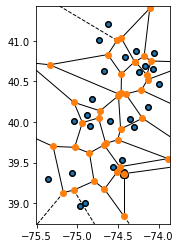

In [10]:
# Let's get stations that are valid for all of our time range. Not perfect, but I'd rather not deal with missing data for now
start = pd.Timestamp(2013,1,1)
end = pd.Timestamp(2018,12,31)
valid_stations = nj_stations[(nj_stations.BEGIN < start) & (nj_stations.END > start)]
plt.figure()

lons = valid_stations.LON.values
lats = valid_stations.LAT.values
plt.plot(lons, lats,'ko')


vor = Voronoi(np.vstack((lons,lats)).T)
voronoi_plot_2d(vor,ax=plt.gca())
plt.gca().set_aspect(1)
valid_stations

In [7]:
stations = valid_stations.index.values.tolist()
print(stations)
valid_stations.to_csv('nj_stations.csv')

['72040799999', '72058199999', '72224754785', '72407093730', '72407493780', '72407513735', '72407754779', '72408454760', '72409014780', '72409454743', '72409514792', '72409614706', '72409754738', '72502014734', '72502594741', '74000154793', '7459663726', '99727099999', '99727699999', '99728999999', '99768799999', '99774399999', '99777999999', '99800299999', '99822799999', '99834299999', '99999913724']


In [8]:
#url = 'https://www.ncdc.noaa.gov/access-data-service/api/v1/dataset'

# url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/dataset'

# params = {
#     'datasetid': 'global-hourly',
#     'startdate': '2013-01-01',
#     'enddate': '2018-12-31',
#     'datatypeid':'GHCND',
#     'stationid': stations,
#     'format': 'json'
    
# }


url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=PRECIP_15&stationid=COOP:010008&units=metric&startdate=2010-01-01&enddate=2018-12-31'


weather_data = pd.DataFrame()

for station in stations:
    params['stationid'] = station
    print('Station:',station)
    res = requests.get(url,params=params)
    js = res.json()
    print(len(js))
    try:
        weather_data = weather_data.append(js)
    except:
        print ("Empty for station",station)
    time.sleep(0.5)


Station: 72040799999
2
Empty for station 72040799999
Station: 72058199999
2
Empty for station 72058199999
Station: 72224754785
2
Empty for station 72224754785
Station: 72407093730
2
Empty for station 72407093730
Station: 72407493780
2
Empty for station 72407493780
Station: 72407513735
2
Empty for station 72407513735
Station: 72407754779
2
Empty for station 72407754779
Station: 72408454760
2
Empty for station 72408454760
Station: 72409014780
2
Empty for station 72409014780
Station: 72409454743
2
Empty for station 72409454743
Station: 72409514792
2
Empty for station 72409514792
Station: 72409614706
2
Empty for station 72409614706
Station: 72409754738
2
Empty for station 72409754738
Station: 72502014734
2
Empty for station 72502014734
Station: 72502594741
2
Empty for station 72502594741
Station: 74000154793
2
Empty for station 74000154793
Station: 7459663726
2
Empty for station 7459663726
Station: 99727099999
2
Empty for station 99727099999
Station: 99727699999
2
Empty for station 9972769

In [9]:
weather_data.head()
weather_data.to_csv('nj_weather_2010-2018_raw.csv')

In [10]:

def parseWindDir(x):
    # Wind direction, deg or 999
    d = x.split(',')[0]
    if d == '999':
        return np.nan
    return float(d)


def parseWindSpeed(x):
    s = x.split(',')[3]
    if s == '9999':
        return 0.0
    return float(s) / 10.0

def parseVisibility(x):
    v = x.split(',')[0]
    if v == '999999':
        return 16093.0
    return float(v)

def parseTemp(x):
    t = x.split(',')[0]
    if t == '+9999':
        return np.nan
    return float(t) / 10.0

def parseSnowDepth(x):
    try:
        t = x.split(',')[0]
    except:
        return 0.0

    if t == '9999':
        return 0.0
    return float(t) 

def parsePrecip(x):
    try:
        p = x.split(',')[1]
        return float(p) / 10.0
    except:
        return 0.0

weather_lut = {
    '01': 'fog',
    '02': 'fog',
    '03': 'thunder',
    '04': 'sleet/hail',
    '05': 'hail',
    '06': 'glaze',
    '07': 'dust',
    '08': 'smoke',
    '09': 'blowing_snow',
    '10': 'tornado',
    '11': 'winds',
    '12': 'spray',
    '13': 'mist',
    '14': 'drizzle',
    '15': 'freezing_drizzle',
    '16': 'rain',
    '17': 'freezing_rain',
    '18': 'snow',
    '19': 'unknown_precipitation',
    '21': 'ground_fog',
    '22': 'ice_fog'
}
def parseWeatherType(x):
    try:
        p = x.split(',')[1]
    except:
        return x
    return weather_lut[p]
        
    
weather_data['DATE'] = pd.to_datetime(weather_data["DATE"])
weather_data['wind_dir'] = weather_data.WND.apply(parseWindDir)
weather_data['wind_speed'] = weather_data.WND.apply(parseWindSpeed)
weather_data['visibility'] = weather_data.VIS.apply(parseVisibility)
weather_data['temperature'] = weather_data.TMP.apply(parseTemp)
weather_data['precip_01'] = weather_data.AA1.apply(parsePrecip)
weather_data['precip_02'] = weather_data.AA2.apply(parsePrecip)
weather_data['precip_03'] = weather_data.AA3.apply(parsePrecip)
weather_data['precip_depth'] = weather_data[['precip_01','precip_02','precip_03']].max(axis=1)
weather_data['snow_depth'] = weather_data.AJ1.apply(parseSnowDepth)
weather_data['AT1'] = weather_data.AT1.apply(parseWeatherType)
weather_data['AT2'] = weather_data.AT2.apply(parseWeatherType)
weather_data['AT3'] = weather_data.AT3.apply(parseWeatherType)
weather_data['AT4'] = weather_data.AT4.apply(parseWeatherType)
weather_data['AT5'] = weather_data.AT5.apply(parseWeatherType)
weather_data['AT6'] = weather_data.AT6.apply(parseWeatherType)
weather_data['AT7'] = weather_data.AT7.apply(parseWeatherType)
weather_data['AT8'] = weather_data.AT8.apply(parseWeatherType)

weather_types = weather_data[['AT1','AT2','AT3','AT4','AT5','AT6','AT7','AT8']]

weather_data['snowing'] = weather_types.apply(lambda x: x.isin(['snow'])).any(axis=1)
weather_data['raining'] = weather_types.apply(lambda x: x.isin(['rain','freezing_rain','drizzle','freezing_drizzle'])).any(axis=1)
weather_data['foggy'] = weather_types.apply(lambda x: x.isin(['fog','ground_fog','ice_fog'])).any(axis=1)
weather_data['thunderstorm'] = weather_types.apply(lambda x: x.str.contains('thunder')).any(axis=1)
weather_data['hailing'] = weather_types.apply(lambda x: x.isin(['sleet/hail','hail'])).any(axis=1)
weather_data['icy'] = weather_types.apply(lambda x: x.isin(['glaze','freezing_rain,freezing_drizzle','ice_fog','snow'])).any(axis=1)
weather_data['station_id'] = weather_data.STATION

# Drop parsed columns
weather_data = weather_data.drop(['WND','VIS','AA1','AA2','AA3','precip_01','precip_02','precip_03','AJ1'],axis=1)
weather_data = weather_data.drop(['TMP','AT1','AT2','AT3','AT4','AT5','AT6','AT7','AT8','SOURCE','REPORT_TYPE','QUALITY_CONTROL','STATION'],axis=1)

In [11]:
weather_data.head()

,DATE,wind_dir,wind_speed,visibility,temperature,precip_depth,snow_depth,snowing,raining,foggy,thunderstorm,hailing,icy,station_id
0,2010-04-12 18:35:00,150.0,10.3,16093.0,17.0,0.0,0.0,False,False,False,False,False,False,72056599999
1,2010-04-12 19:00:00,140.0,8.7,16093.0,16.0,0.0,0.0,False,False,False,False,False,False,72056599999
2,2010-04-12 19:14:00,180.0,5.7,16093.0,16.0,0.0,0.0,False,False,False,False,False,False,72056599999
3,2010-04-12 19:35:00,180.0,5.1,16093.0,15.0,0.0,0.0,False,False,False,False,False,False,72056599999
4,2010-04-12 19:54:00,180.0,3.6,16093.0,16.0,0.0,0.0,False,False,False,False,False,False,72056599999


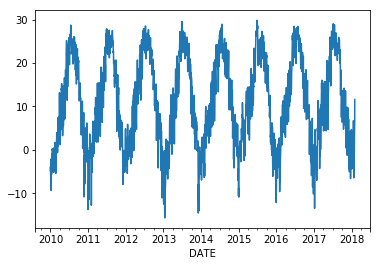

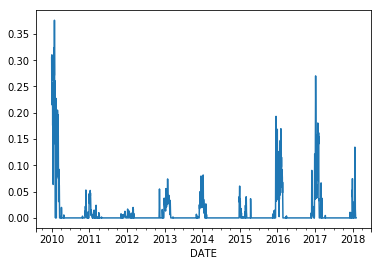

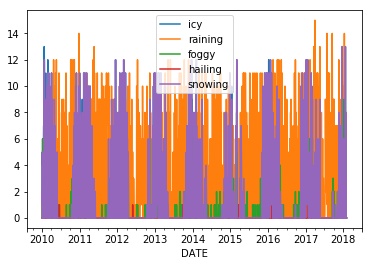

In [12]:
ts = weather_data.set_index('DATE').temperature.resample('1d').mean()
ts.plot()
ts = weather_data.set_index('DATE').snow_depth.resample('1d').mean()
plt.figure()
ts.plot()
ts = weather_data.set_index('DATE')[['icy','raining','foggy','hailing','snowing']].resample('1d').sum()
plt.figure()
ts.plot()

In [3]:
#weather_data.to_csv('utah_weather_2010-2018.csv')
weather_data = pd.read_csv('utah_weather_2010-2018.csv',index_col=0)
weather_data.head()

C:\Users\dani9510\AppData\Local\ESRI\conda\envs\venv\lib\site-packages\numpy\lib\arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,DATE,wind_dir,wind_speed,visibility,temperature,precip_depth,snow_depth,snowing,raining,foggy,thunderstorm,hailing,icy,station_id
0,2010-01-01 00:53:00,40.0,2.1,16093.0,-11.7,0.0,0.0,False,False,False,False,False,False,72470093141
1,2010-01-01 01:53:00,30.0,2.6,16093.0,-11.7,0.0,0.0,False,False,False,False,False,False,72470093141
2,2010-01-01 02:53:00,40.0,2.1,16093.0,-12.2,0.0,0.0,False,False,False,False,False,False,72470093141
3,2010-01-01 03:53:00,40.0,2.6,16093.0,-11.7,0.0,0.0,False,False,False,False,False,False,72470093141
4,2010-01-01 04:53:00,40.0,2.1,16093.0,-9.4,0.0,0.0,False,False,False,False,False,False,72470093141


In [4]:
weather_data['timestamp'] = pd.to_datetime(weather_data.DATE)

In [5]:
time_index = pd.DatetimeIndex(weather_data['timestamp'])

In [50]:
aggs = {
    'snowing': 'any',
    'raining': 'any',
    'foggy': 'any',
    'icy': 'any',
    'hailing': 'any',
    'thunderstorm':'any',
    'wind_speed': 'mean',
    'visibility': 'mean',
    'temperature': 'mean',
    'precip_depth':'mean',
    'snow_depth':'mean'
}

In [60]:
resamp = pd.DataFrame()
for _id in station_ids:
    idx = weather_data.station_id == _id
    ti = time_index[idx]

    wdfi = weather_data[idx].set_index(ti)
    floating = wdfi[['visibility','temperature','wind_speed','precip_depth','snow_depth']]
    binaries = wdfi[['snowing','raining','foggy','icy','hailing','thunderstorm']]
    b = binaries.resample('1h').rolling(24).apply(lambda x: x.any())
    f = floating.resample('1h').agg({
        'wind_speed': 'mean',
        'visibility': 'mean',
        'temperature': 'mean',
        'precip_depth':'mean',
        'snow_depth':'mean'
    })

    temp = pd.concat((f,b),axis=1)
    temp['station_id'] = _id
    resamp = resamp.append(temp)


C:\Users\dani9510\AppData\Local\ESRI\conda\envs\venv\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
.resample() is now a deferred operation
You called rolling(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


In [61]:
for f in ['visibility','temperature','wind_speed','precip_depth','snow_depth']:
    resamp.loc[pd.isna(resamp[f]),f] = np.nanmedian(resamp[f])
for f in ['snowing','raining','foggy','icy','hailing','thunderstorm']:
    resamp.loc[pd.isna(resamp[f]),f] = 0

In [71]:
resamp.reset_index().set_index(['timestamp','station_id']).to_csv('utah_weather_2010-2018_grouped.csv')

In [18]:
if False:
    t = time.time()
    resamp = weather_data.set_index(['station_id',time_index.floor('1h')]).groupby(level=[0,1]).agg(aggs)
    print (time.time() - t)

1218.8045225143433


In [19]:
if False: resamp.to_csv('utah_weather_2010-2018_grouped.csv')

In [24]:
samps = resamp.reset_index().set_index('timestamp')

In [36]:
#samps[samps.snowing == True]
samps['2016-01-06T06:00:00'].to_csv('test_hour.csv')